In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
train = pd.read_csv(r"C:\Users\hp\Desktop\own\Air pollution-Multivariate regression\Train\Train.csv")
test=pd.read_csv(r"C:\Users\hp\Desktop\own\Air pollution-Multivariate regression\Test\Test.csv")

In [3]:
train=np.asarray(train)
test=np.asarray(test)

In [4]:
x=train[:,:5] #Extracting all the 5 features
y=train[:,5]  #Extracting the output

In [5]:
print(x.shape,y.shape)

(1600, 5) (1600,)


In [6]:
class MultiVariateLinearRegression:
    
    def __init__(self, X, y):
        self.X = ((X - X.mean(axis=0))/X.std(axis=0))
        self.y = y
        self.coefs = np.random.uniform(low=-1, high=1, size=(X.shape[1],))
        self.bias = np.random.random()
        
    def compute_loss(self):
        losses = []
        for x,y in zip(self.X, self.y):
            yhat = self.predict(x)
            loss = (y - yhat)**2
            losses.append(loss)
        
        losses = np.array(losses)
        return losses.sum() / (2 * self.X.shape[0])
    
    ### Gradient Descent
    def calculate_gradients(self):
        grad_00 = 0
        coefs = list()
        
        yhat = np.array(self.get_all_preds())
        diff = yhat - self.y
        grad_00 += diff.sum()/self.X.shape[0]
        
        for j in range(self.X.shape[1]):
            grad = (diff * self.X[:, j]).sum() / self.X.shape[0]
            coefs.append(grad)
            
        coefs = np.array(coefs)
        return (grad_00, coefs)
        
        
    def update_weights(self, gradients, learning_rate):
        grad_00, coefs = gradients
        self.bias = self.bias - (learning_rate * grad_00)
        self.coefs = self.coefs - (coefs * learning_rate)
    
    def predict(self, x):
        return self.coefs.dot(x) + self.bias
    
#     def score(self):
#         pass
    
    def get_all_preds(self):
        preds = []
        for x in self.X:
            preds.append(self.predict(x))
        return preds
    
    def train(self, losses, iterations=1, alpha=0.01):
        for _ in range(iterations):
            gradients = self.calculate_gradients()
            self.update_weights(gradients, alpha)
            losses.append(self.compute_loss())
        return losses

In [7]:
multivariate = MultiVariateLinearRegression(x, y)
losses = [multivariate.compute_loss()]  

In [8]:
losses

[6196.818978395318]

In [9]:
losses = multivariate.train(losses, iterations=400, alpha=0.05)
losses[-10:]

[207.7766577743085,
 207.7766577743085,
 207.7766577743085,
 207.7766577743084,
 207.77665777430843,
 207.77665777430843,
 207.7766577743084,
 207.7766577743084,
 207.7766577743084,
 207.7766577743084]

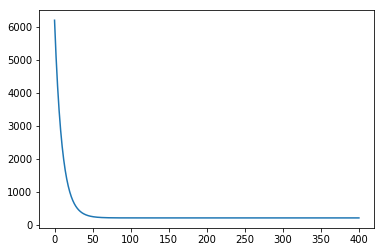

In [10]:
plt.figure()
plt.plot(losses)
plt.show()

In [11]:
multivariate.coefs

array([29.59359188, 94.65067684,  8.37544441, 45.52303622,  2.46461534])

# SKLEARN

In [12]:
from sklearn import linear_model

In [13]:
regr = linear_model.LinearRegression()

In [14]:
regr.fit(x, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 4.990966735574957
Coefficients: 
 [29.68187118 92.66247759  8.28062089 44.76773522  2.51916121]


In [23]:
# prediction with sklearn
predictions=regr.predict(x)

In [24]:
predictions=predictions.reshape(-1,1)
y=y.reshape(-1,1)
print(predictions.shape,y.shape)

(1600, 1) (1600, 1)


In [25]:
regr.score(x,y)

0.9660939669975616

In [26]:
predtest=regr.predict(test)

In [28]:
df = pd.DataFrame({"y" : predtest})      #prediction of value for the Test.csv and storing in the result.csv file
df.to_csv("result.csv", index=True) 